In [1]:
%load_ext autoreload
import sys
sys.path.append("..")

In [2]:
%matplotlib inline

In [7]:
%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

import numpy as np

import darkhistory.physics as phys

import main

In [12]:
helium_method_1 = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e24, primary='phot_delta',
    start_rs = 3000,
    coarsen_factor=1, backreaction=True,
    helium_TLA=True, compute_fs_method='old'
)

-0.8385835906917896


../darkhistory/physics.py:474: RuntimeWarning: invalid value encountered in double_scalars
  / (1 + 0.6703 * (conv_fac*T_m)**0.5300)
../darkhistory/physics.py:502: RuntimeWarning: invalid value encountered in sqrt
  * (1 + T_in_K/T_1)**(1+p)
../darkhistory/physics.py:502: RuntimeWarning: invalid value encountered in double_scalars
  * (1 + T_in_K/T_1)**(1+p)


-2.398373772130881
-1.7388836399262582


In [53]:
%autoreload
helium_method_2 = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e24, primary='phot_delta',
    start_rs = 3000,
    coarsen_factor=1, backreaction=True,
    helium_TLA=True, compute_fs_method='helium', rtol=1e-5
)

In [54]:
helium_method_3 = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e24, primary='phot_delta',
    start_rs = 3000,
    coarsen_factor=1, backreaction=True,
    helium_TLA=True, compute_fs_method='helium_recomb', rtol=1e-5
)

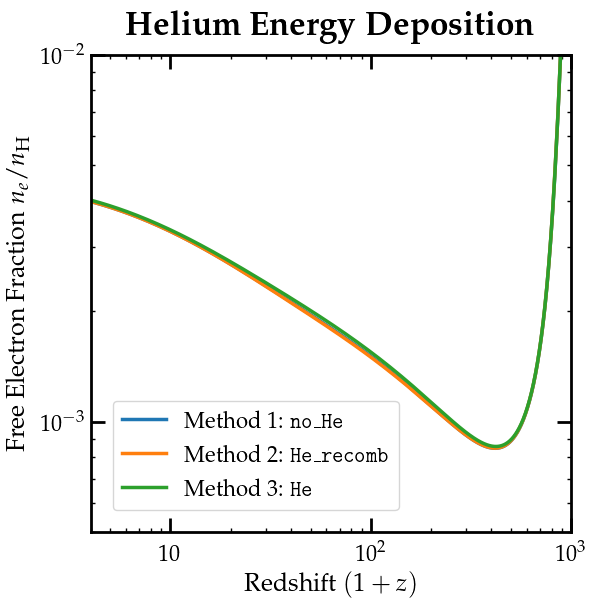

In [97]:
xe_plt = plt.figure()

plt.loglog()

plt.plot(helium_method_1['rs'], helium_method_1['x'][:,0]+helium_method_1['x'][:,1], label=r'Method 1: $\texttt{no\_He}$')
plt.plot(helium_method_3['rs'], helium_method_3['x'][:,0]+helium_method_3['x'][:,1], label=r'Method 2: $\texttt{He\_recomb}$')
plt.plot(helium_method_2['rs'], helium_method_2['x'][:,0]+helium_method_2['x'][:,1], label=r'Method 3: $\texttt{He}$')

plt.legend(loc='lower left')

plt.xlabel(r'Redshift $(1+z)$')
plt.ylabel(r'Free Electron Fraction $n_e/n_\mathrm{H}$')

plt.title(r'\bf{Helium Energy Deposition}')

plt.axis([4, 1e3, 5e-4, 1e-2])

plt.savefig('/Users/hongwan/Dropbox (MIT)/Photon Deposition/Draft/plots/He_f_method_xe.pdf')


In [94]:
?plt.savefig

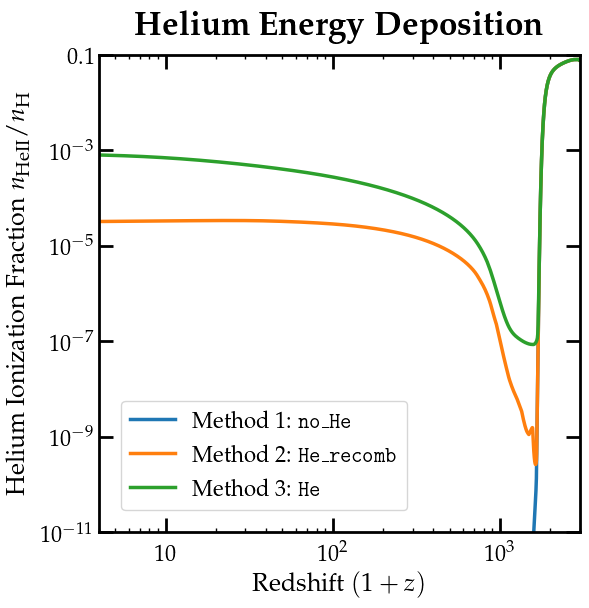

In [98]:
plt.figure()

plt.loglog()

plt.plot(helium_method_1['rs'], helium_method_1['x'][:,1], label=r'Method 1: $\texttt{no\_He}$')
plt.plot(helium_method_3['rs'], helium_method_3['x'][:,1], label=r'Method 2: $\texttt{He\_recomb}$')
plt.plot(helium_method_2['rs'], helium_method_2['x'][:,1], label=r'Method 3: $\texttt{He}$')

plt.legend(loc='lower left')

plt.xlabel(r'Redshift $(1+z)$')
plt.ylabel(r'Helium Ionization Fraction $n_\mathrm{HeII}/n_\mathrm{H}$')

plt.title(r'\bf{Helium Energy Deposition}')

plt.axis([4, 3e3, 1e-11, .1])

plt.savefig('/Users/hongwan/Dropbox (MIT)/Photon Deposition/Draft/plots/He_f_method_xHeII.pdf')



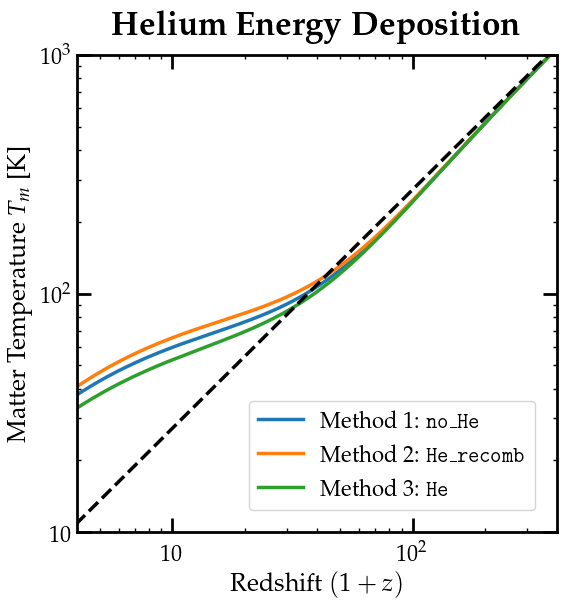

In [99]:
plt.figure()

plt.loglog()

plt.plot(helium_method_1['rs'], helium_method_1['Tm']/phys.kB, label=r'Method 1: $\texttt{no\_He}$')
plt.plot(helium_method_3['rs'], helium_method_3['Tm']/phys.kB, label=r'Method 2: $\texttt{He\_recomb}$')
plt.plot(helium_method_2['rs'], helium_method_2['Tm']/phys.kB, label=r'Method 3: $\texttt{He}$')

plt.plot(helium_method_1['rs'], phys.TCMB(helium_method_1['rs'])/phys.kB, 'k--')

plt.legend(loc='lower right')

plt.xlabel(r'Redshift $(1+z)$')
plt.ylabel(r'Matter Temperature $T_m$ [K]')

plt.title(r'\bf{Helium Energy Deposition}')

plt.axis([4, 400, 10, 1e3])

plt.savefig('/Users/hongwan/Dropbox (MIT)/Photon Deposition/Draft/plots/He_f_method_Tm.pdf')


In [104]:
import pickle 
pickle.dump(
    (helium_method_1, helium_method_2, helium_method_3), 
    open('/Users/hongwan/Dropbox (MIT)/Photon Deposition/Helium_f_cross_checks/data.p','wb')
)

In [131]:
coarsen_1 = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e24, primary='phot_delta',
    start_rs = 3000,
    coarsen_factor=1, backreaction=True,
    helium_TLA=True, reion_switch=True, compute_fs_method='old'
)

In [136]:
coarsen_2 = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e24, primary='phot_delta',
    start_rs = 3000,
    coarsen_factor=2, backreaction=True,
    helium_TLA=True, reion_switch=True, compute_fs_method='old', rtol=1e-5
)

In [138]:
coarsen_4 = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e24, primary='phot_delta',
    start_rs = 3000,
    coarsen_factor=4, backreaction=True,
    helium_TLA=True, reion_switch=True, compute_fs_method='old', rtol = 1e-5
)

In [143]:
coarsen_8 = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e24, primary='phot_delta',
    start_rs = 3000,
    coarsen_factor=8, backreaction=True,
    helium_TLA=True, reion_switch=True, compute_fs_method='old', rtol = 1e-5
)

In [146]:
coarsen_16 = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e24, primary='phot_delta',
    start_rs = 3000,
    coarsen_factor=16, backreaction=True,
    helium_TLA=True, reion_switch=True, compute_fs_method='old', rtol = 1e-5
)

In [149]:
coarsen_32 = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e24, primary='phot_delta',
    start_rs = 3000,
    coarsen_factor=32, backreaction=True,
    helium_TLA=True, reion_switch=True, compute_fs_method='old', rtol = 1e-5
)

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


[0, 3000, 0.9, 1.1]

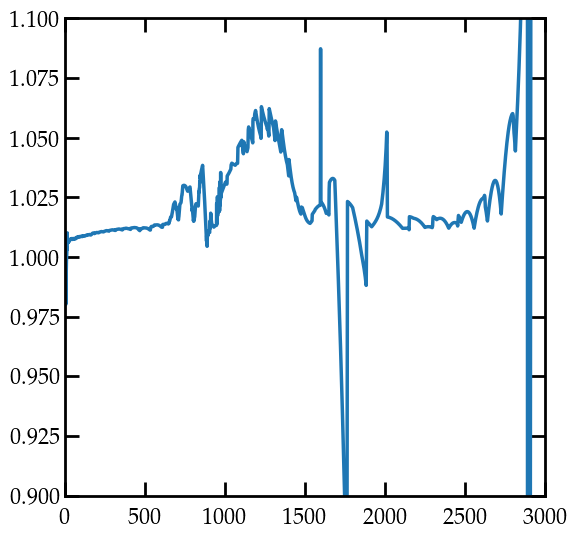

In [208]:
plt.figure()

# plt.loglog()

from scipy.interpolate import interp1d

coarsen_32_interp = {
    chan: interp1d(coarsen_32['rs'], coarsen_32['f']['low'][chan], bounds_error=False) 
    for chan in ['H ion', 'He ion', 'exc', 'heat', 'cont']
}
                     
chan = 'cont'

plt.plot(coarsen_1['rs'], coarsen_1['f']['low'][chan]/coarsen_32_interp[chan](coarsen_1['rs']))

plt.axis([0, 3000, 0.9, 1.1])

[4.0, 30, 30, 500000.0]

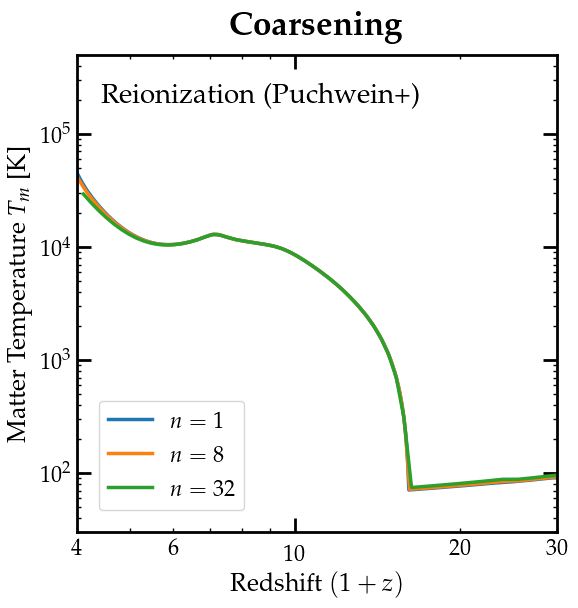

In [221]:
plt.figure()

plt.loglog()

plt.plot(coarsen_1['rs'], coarsen_1['Tm']/phys.kB, label=r'$n = 1$')
# plt.plot(coarsen_2['rs'], coarsen_2['Tm']/phys.kB)
# plt.plot(coarsen_4['rs'], coarsen_4['Tm']/phys.kB)
plt.plot(coarsen_8['rs'], coarsen_8['Tm']/phys.kB, label=r'$n=8$')
# plt.plot(coarsen_16['rs'], coarsen_16['Tm']/phys.kB)
plt.plot(coarsen_32['rs'], coarsen_32['Tm']/phys.kB, label=r'$n=32$')

plt.legend(loc='lower left')


plt.xlabel(r'Redshift $(1+z)$')
plt.ylabel(r'Matter Temperature $T_m$ [K]')

plt.title(r'\bf{Coarsening}')

ax = plt.gca()

plt.text(0.05, 0.9, 'Reionization (Puchwein+)', transform=ax.transAxes, fontsize=20)

plt.axis([4., 30, 30, 5e5])

# plt.savefig('/Users/hongwan/Dropbox (MIT)/Photon Deposition/Draft/plots/coarsening.pdf')

[4, 30, 0.0005, 10]

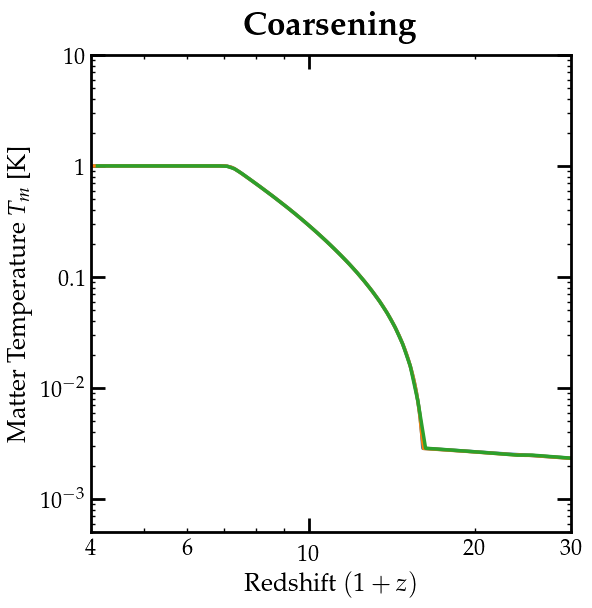

In [182]:
plt.figure()

plt.loglog()

plt.plot(coarsen_1['rs'], coarsen_1['x'][:,0])
# plt.plot(coarsen_2['rs'], coarsen_2['Tm']/phys.kB)
# plt.plot(coarsen_4['rs'], coarsen_4['Tm']/phys.kB)
plt.plot(coarsen_8['rs'], coarsen_8['x'][:,0])
# plt.plot(coarsen_16['rs'], coarsen_16['Tm']/phys.kB)
plt.plot(coarsen_32['rs'], coarsen_32['x'][:,0])



plt.xlabel(r'Redshift $(1+z)$')
plt.ylabel(r'Matter Temperature $T_m$ [K]')

plt.title(r'\bf{Coarsening}')

plt.axis([4, 30, 5e-4, 10])

In [183]:
pickle.dump(
    (coarsen_1, coarsen_2, coarsen_4,
    coarsen_8, coarsen_16, coarsen_32), 
    open('/Users/hongwan/Dropbox (MIT)/Photon Deposition/cross_checks/coarsening_reion_data.p','wb')
)